In [25]:
import numpy as np
from sklearn.datasets import fetch_mldata
import pandas as pd
%matplotlib notebook

In [26]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [27]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [28]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: ', df.shape)

Size of the dataframe:  (70000, 785)


In [29]:
rndperm = np.random.permutation(df.shape[0])

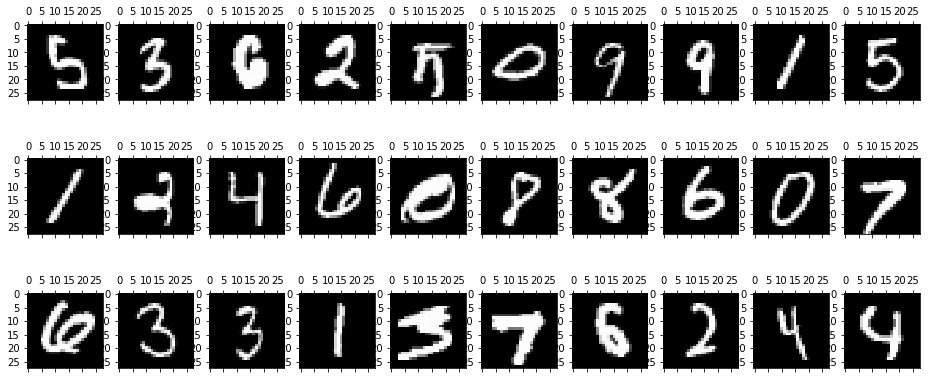

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: ,', format(pca.explained_variance_ratio_))

Explained variation per principal component: , [ 0.09746116  0.07155445  0.06149531]


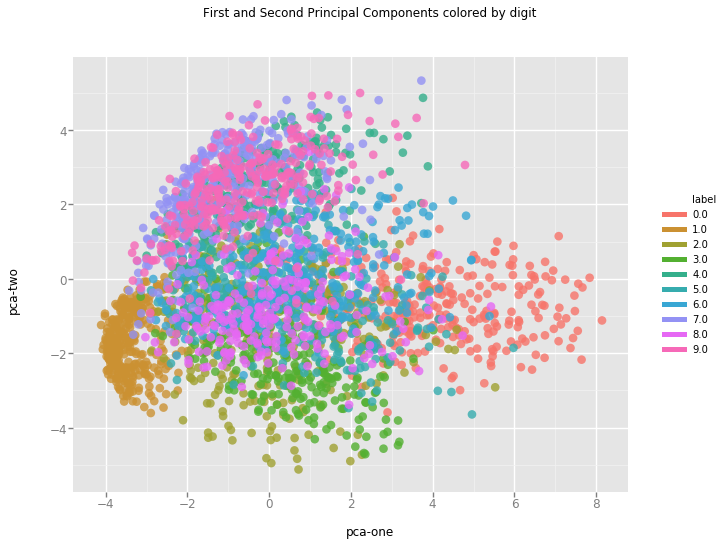

<ggplot: (-9223372036534880203)>

In [32]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [33]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.962722,-1.137112,2.259388
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053180,-1.377192,1.954507
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.413442,-0.957740,2.467245
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.694988,-0.962350,3.405158
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.454245,-0.316517,-0.755409


(3000, 788)


<IPython.core.display.Javascript object>


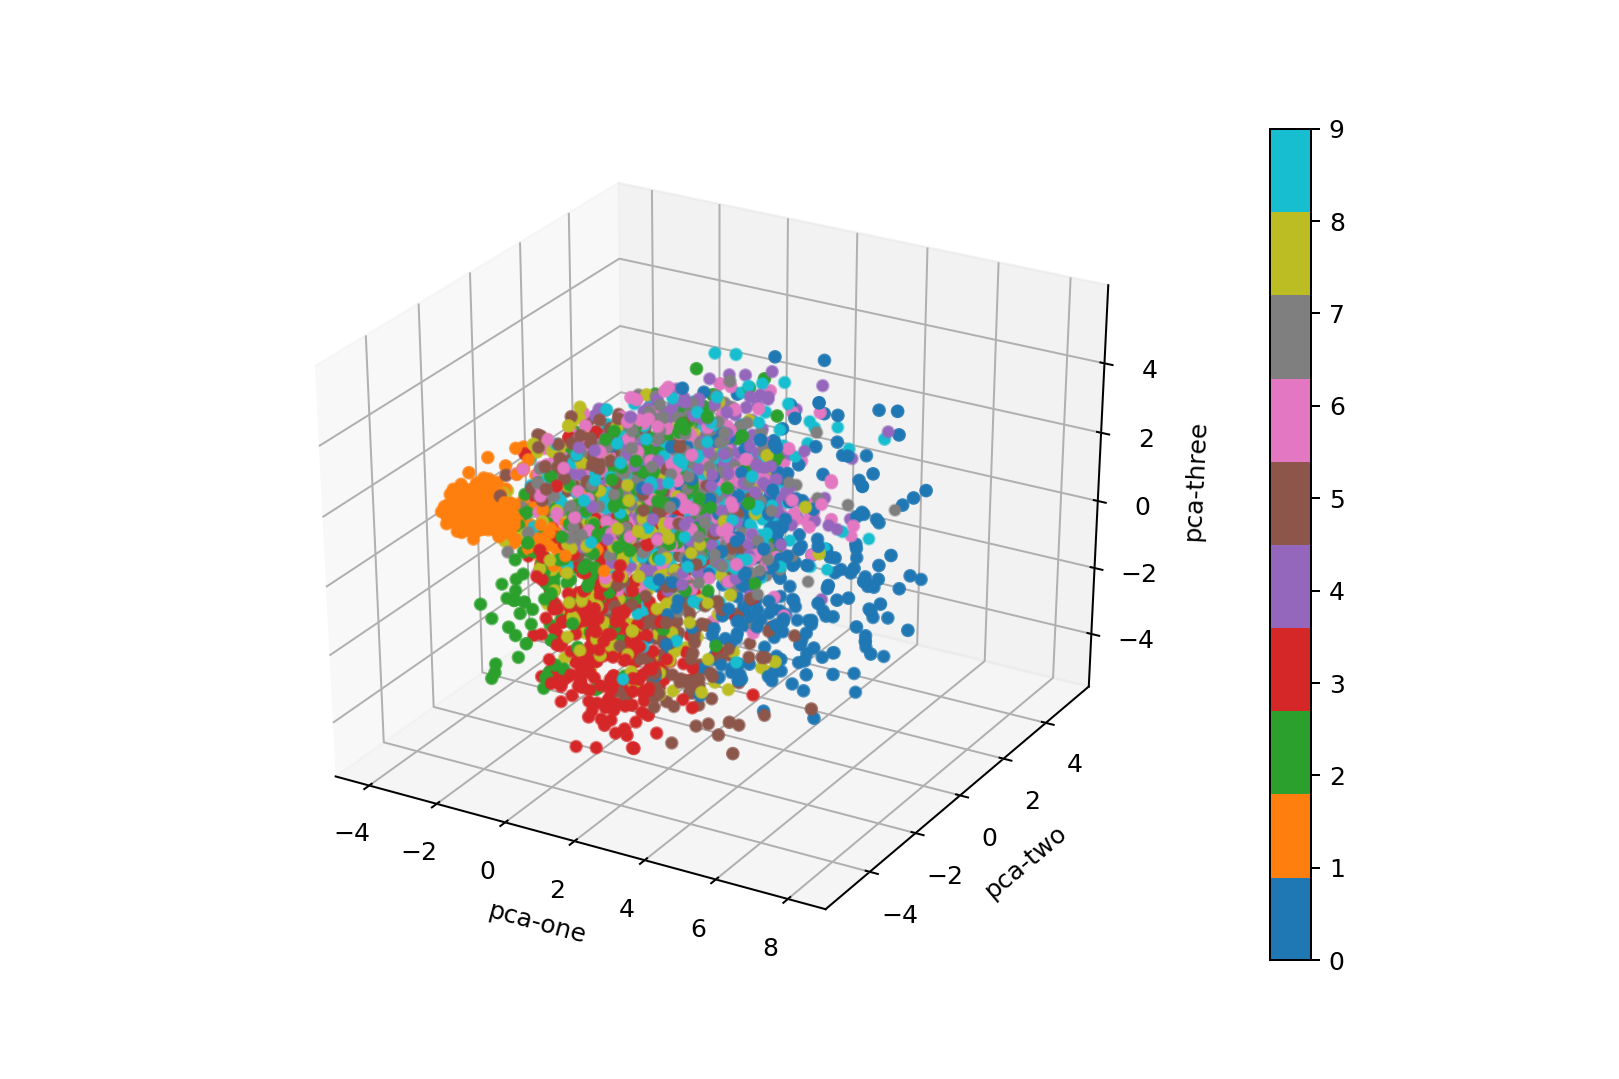

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib notebook
plt.ion()

df_ = df.loc[rndperm[:3000],:]
print(df_.shape)

fig = plt.figure(figsize=(9,6))
chart3d = fig.add_subplot(111, projection='3d')
c3d = chart3d.scatter(df_['pca-one'], df_['pca-two'], df_['pca-three'], c=pd.to_numeric(df_['label']), cmap=cm.tab10)
chart3d.set_xlabel('pca-one')
chart3d.set_ylabel('pca-two')
chart3d.set_zlabel('pca-three')
fig.colorbar(c3d)
plt.show()